In [1]:
import tensorflow as tf
import numpy as np

D:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sess = tf.Session()

In [3]:
x_vals = np.array([1.0, 3.0, 5.0, 7.0, 9.0])
x_data = tf.placeholder(tf.float32)
my_const = tf.constant(3.0)
my_product = tf.multiply(x_data, my_const)
for x_val in x_vals:
    print(sess.run(my_product, feed_dict={x_data: x_val}))

3.0
9.0
15.0
21.0
27.0


In [5]:
my_array = np.array([[1.0, 3.0, 5.0, 7.0, 9.0], [-2.0, 0.0, 2.0, 4.0, 6.0], [-6.0, -3.0, 0.0, 3.0, 6.0]])
x_vals = np.array([my_array, my_array + 1])
x_data = tf.placeholder(tf.float32, shape=(3, 5))
m1 = tf.constant([[1.0], [0.0], [-1.0], [2.0], [4.0]])
m2 = tf.constant([[2.0]])
a1 = tf.constant([[10.0]])
prod1 = tf.matmul(x_data, m1)
prod2 = tf.matmul(prod1, m2)
add1 = tf.add(prod2, a1)
for x_val in x_vals:
    print(sess.run(add1, feed_dict={x_data: x_val}))

[[102.]
 [ 66.]
 [ 58.]]
[[114.]
 [ 78.]
 [ 70.]]


In [7]:
x_shape = [1, 4, 4, 1]
x_val = np.random.uniform(size=x_shape)
x_data = tf.placeholder(tf.float32, shape=x_shape)
my_filter = tf.constant(0.25, shape=[2, 2, 1, 1])
my_strides = [1, 2, 2, 1]
mov_avg_layer = tf.nn.conv2d(x_data, my_filter, my_strides, padding="SAME", name="Moving_Avg_Window")

In [10]:
def custom_layer(input_matrix):
    input_matrix_squeezed = tf.squeeze(input_matrix)
    A = tf.constant([[1.0, 2.0], [-1.0, 3.0]])
    b = tf.constant(1.0, shape=[2, 2])
    temp1 = tf.matmul(A, input_matrix_squeezed)
    temp = tf.add(temp1, b)
    return tf.sigmoid(temp)

In [11]:
with tf.name_scope('Custom_Layer') as scope:
    custom_layer1 = custom_layer(mov_avg_layer)
    print(sess.run(custom_layer1, feed_dict={x_data: x_val}))

[[0.9093057  0.9017819 ]
 [0.81714046 0.87712216]]


In [12]:
import matplotlib.pyplot as plt

In [13]:
x_vals = tf.linspace(-1.0, 1.0, 500)
target = tf.constant(0.0)
l2_y_vals = tf.square(target - x_vals)
l2_y_out = sess.run(l2_y_vals)

In [15]:
print(l2_y_out.shape)

(500,)


In [16]:
l1_y_vals = tf.abs(target - x_vals)
l1_y_out = sess.run(l1_y_vals)

In [17]:
delta1 = tf.constant(0.25)
phuber1_y_vals = tf.multiply(tf.square(delta1), tf.sqrt(1.0 + tf.square((target - x_vals) / delta1)) - 1.0)
phuber1_y_out = sess.run(phuber1_y_vals)
delta2 = tf.constant(5.0)
phuber2_y_vals = tf.multiply(tf.square(delta2), tf.sqrt(1.0 + tf.square((target - x_vals) / delta2)) - 1.0)
phuber2_y_out = sess.run(phuber2_y_vals)

In [18]:
x_vals = tf.linspace(-3.0, 5.0, 500)
target = tf.constant(1.0)
targets = tf.fill([500,], 1.0)

In [19]:
hinge_y_vals = tf.maximum(0.0, 1.0 - tf.multiply(target, x_vals))
hinge_y_out = sess.run(hinge_y_vals)

In [20]:
print(hinge_y_out.shape)

(500,)


In [39]:
x_vals = tf.constant([[0.000123394, 0.00000226, 0.99987435]])
target = tf.constant([[0.0, 0.0, 1]])
# xentropy_y_vals = - tf.multiply(target, tf.log(x_vals)) - tf.multiply((1.0 - target), tf.log(1.0 - x_vals))
xentropy_y_vals = - tf.multiply(target, tf.log(x_vals))
xentropy_y_out = sess.run(tf.reduce_sum(xentropy_y_vals))
print(xentropy_y_out)

0.00012565448


In [24]:
xentropy_sigmoid_y_vals = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_vals, labels=targets)
xentropy_sigmoid_y_out = sess.run(xentropy_sigmoid_y_vals)

In [25]:
weight = tf.constant(0.5)
xentropy_weighted_y_vals = tf.nn.weighted_cross_entropy_with_logits(x_vals, targets, weight)
xentropy_weighted_y_out = sess.run(xentropy_weighted_y_vals)

In [27]:
unscaled_logits = tf.constant([[1.0, -3.0, 10.0]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=unscaled_logits, labels=target_dist)
print(sess.run(softmax_xentropy))

[1.1601256]


In [38]:
unscaled_logits = tf.constant([[1.0, -3.0, 10.0]])
sparse_target_dist = tf.constant([2])
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=unscaled_logits, labels=sparse_target_dist)
print(sess.run(sparse_xentropy))

[0.00012564]


In [43]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10.0, 100)
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1]))

my_output = tf.multiply(x_data, A)
loss = tf.square(my_output - y_target)
init = tf.initialize_all_variables()
sess.run(init)

my_opt = tf.train.GradientDescentOptimizer(learning_rate=0.02)
train_step = my_opt.minimize(loss)

In [44]:
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i + 1) % 25 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})))

Step #25 A = [5.8754625]
Loss = [16.861053]
Step #50 A = [8.449252]
Loss = [4.9761777]
Step #75 A = [9.406326]
Loss = [0.37175062]
Step #100 A = [9.849413]
Loss = [0.01870767]


In [45]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

In [46]:
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(3, 1, 50)))
y_vals = np.concatenate((np.repeat(0.0, 50), np.repeat(1.0, 50)))
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))

In [47]:
my_out = tf.add(x_data, A)

In [48]:
my_output_expanded = tf.expand_dims(my_out, 0)
y_target_expanded = tf.expand_dims(y_target, 0)

In [49]:
init = tf.initialize_all_variables()
sess.run(init)

In [50]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output_expanded, labels=y_target_expanded)
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [53]:
for i in range(1400):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    
    if (i + 1) % 200 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #200 A = [-1.0388795]
Loss = [[0.14810355]]
Step #400 A = [-1.257227]
Loss = [[0.01725669]]
Step #600 A = [-1.2030206]
Loss = [[0.19346954]]
Step #800 A = [-0.9870426]
Loss = [[0.2582842]]
Step #1000 A = [-1.1258522]
Loss = [[0.163909]]
Step #1200 A = [-1.0716832]
Loss = [[0.13380006]]
Step #1400 A = [-0.9748355]
Loss = [[0.16134198]]


In [54]:
batch_size = 20

In [55]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10.0, 100)
x_data = tf. placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
my_output = tf.matmul(x_data, A)

In [58]:
init = tf.initialize_all_variables()
sess.run(init)
loss = tf.reduce_mean(tf.square(my_output - y_target))
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)
loss_batch = []
for i in range(100):
    rand_index = np.random.choice(100, size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i + 1) % 5 == 0:
        print(' Step #' + str(i + 1) + 'A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

 Step #5A = [[1.9509983]]
Loss = 65.2769
 Step #10A = [[3.4512057]]
Loss = 43.03061
 Step #15A = [[4.6584244]]
Loss = 28.862925
 Step #20A = [[5.63731]]
Loss = 18.760433
 Step #25A = [[6.4213586]]
Loss = 11.726896
 Step #30A = [[7.049718]]
Loss = 7.7106194
 Step #35A = [[7.576313]]
Loss = 5.760316
 Step #40A = [[7.9995623]]
Loss = 4.117017
 Step #45A = [[8.354211]]
Loss = 3.0095248
 Step #50A = [[8.638408]]
Loss = 2.3310833
 Step #55A = [[8.854534]]
Loss = 0.9764978
 Step #60A = [[9.031059]]
Loss = 2.155053
 Step #65A = [[9.168867]]
Loss = 1.2489034
 Step #70A = [[9.27137]]
Loss = 0.8434998
 Step #75A = [[9.361815]]
Loss = 1.7305057
 Step #80A = [[9.449306]]
Loss = 1.4040096
 Step #85A = [[9.4939785]]
Loss = 1.2148982
 Step #90A = [[9.534261]]
Loss = 1.2853885
 Step #95A = [[9.576522]]
Loss = 0.6500388
 Step #100A = [[9.604744]]
Loss = 0.64303863


In [61]:
loss_stochastic = []
update=tf.assign(A,tf.random_normal(shape=[1, 1]))
sess.run(update)
for i in range(100):
    rand_index = np.random.choice(100)
    rand_x = np.reshape([x_vals[rand_index]], [1, 1])
    rand_y = np.reshape([y_vals[rand_index]], [1, 1])
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if (i + 1) % 5 == 0:
        print('Step #' + str(i + 1) + 'A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5A = [[2.2876282]]
Loss = 60.88534
Step #10A = [[3.7844908]]
Loss = 35.91825
Step #15A = [[4.9297967]]
Loss = 24.678324
Step #20A = [[5.8504624]]
Loss = 10.862158
Step #25A = [[6.6446557]]
Loss = 21.668743
Step #30A = [[7.2919474]]
Loss = 9.171614
Step #35A = [[7.773166]]
Loss = 6.8065987
Step #40A = [[8.195176]]
Loss = 8.188808
Step #45A = [[8.599796]]
Loss = 5.0000353
Step #50A = [[8.87459]]
Loss = 3.1121566
Step #55A = [[9.060316]]
Loss = 0.4129226
Step #60A = [[9.254576]]
Loss = 1.5459193
Step #65A = [[9.501839]]
Loss = 2.0635147
Step #70A = [[9.539347]]
Loss = 0.021860197
Step #75A = [[9.7276745]]
Loss = 1.9138931
Step #80A = [[9.732882]]
Loss = 0.046912022
Step #85A = [[9.756586]]
Loss = 0.10873573
Step #90A = [[9.876298]]
Loss = 0.39421904
Step #95A = [[9.798849]]
Loss = 0.016349904
Step #100A = [[9.84274]]
Loss = 0.74936676


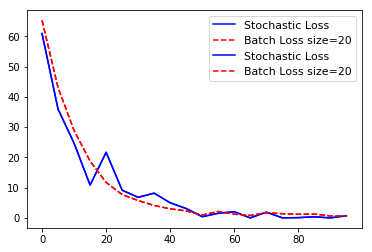

In [63]:
plt.plot(range(0, 100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 100, 5), loss_batch, 'r--', label='Batch Loss size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()

In [65]:
from sklearn import datasets
iris = datasets.load_iris()
binary_target = np.array([1.0 if x == 0 else 0.0 for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

In [66]:
batch_size = 20
x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1]))

In [69]:
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_sub = tf.subtract(x1_data, my_add)

In [71]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_sub, labels=y_target)
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [72]:
init = tf.initialize_all_variables()
sess.run(init)

In [73]:
for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size=batch_size)
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step, feed_dict={x1_data:rand_x1, x2_data:rand_x2, y_target:rand_y})
    if (i + 1) % 200 == 0:
        print('Step #' + str(i + 1) + 'A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))

Step #200A = [[8.569322]], b = [-3.491264]
Step #400A = [[10.153752]], b = [-4.566346]
Step #600A = [[11.056842]], b = [-5.3549232]
Step #800A = [[11.842841]], b = [-5.8201222]
Step #1000A = [[12.341285]], b = [-6.3552322]


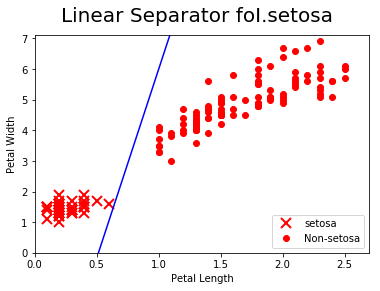

In [76]:
[[slope]] = sess.run(A)
[intercept] = sess.run(b)
x = np.linspace(0, 3, num=50)
abline_values = []
for i in x:
    abline_values.append(slope * i + intercept)
setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] == 1]
setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] == 1]
non_setosa_x = [a[1] for i, a in enumerate(iris_2d) if binary_target[i] == 0]
non_setosa_y = [a[0] for i, a in enumerate(iris_2d) if binary_target[i] == 0]
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
plt.plot(x, abline_values, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator foI.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()

In [77]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10.0, 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
batch_size = 25
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
A = tf.Variable(tf.random_normal(shape=[1, 1]))

In [78]:
my_output = tf.matmul(x_data, A)
loss = tf.reduce_mean(tf.square(my_output - y_target))
init = tf.initialize_all_variables()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

In [79]:
for i in range(100):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i + 1) % 25 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #25 A = [[6.30002]]
Loss = 13.676422
Step #50 A = [[8.611217]]
Loss = 3.3671424
Step #75 A = [[9.39735]]
Loss = 1.4102405
Step #100 A = [[9.688823]]
Loss = 1.3997464


In [80]:
mse_test = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_test]), y_target: np.transpose([y_vals_test])})
mse_train = sess.run(loss, feed_dict={x_data: np.transpose([x_vals_train]), y_target: np.transpose([y_vals_train])})
print('MSE on test:' + str(np.round(mse_test, 2)))
print('MSE on train:' + str(np.round(mse_train, 2)))

MSE on test:0.92
MSE on train:1.09


In [81]:
ops.reset_default_graph()
sess = tf.Session()
batch_size = 25
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(2, 1, 50)))
y_vals = np.concatenate((np.repeat(0.0, 50), np.repeat(1.0, 50)))
x_data = tf.placeholder(shape=[1, None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1, None], dtype=tf.float32)

train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]
A = tf.Variable(tf.random_normal(shape=[1, 1]))

In [82]:
my_output = tf.add(x_data, A)
init = tf.initialize_all_variables()
sess.run(init)
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target))
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(xentropy)

In [83]:
for i in range(1800):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_index]]
    rand_y = [y_vals_train[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    if (i + 1) % 200 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))

Step #200 A = [[-0.29843095]]
Loss = 0.32969725
Step #400 A = [[-0.4420942]]
Loss = 0.30725735
Step #600 A = [[-0.5055693]]
Loss = 0.28091228
Step #800 A = [[-0.5346466]]
Loss = 0.26987
Step #1000 A = [[-0.5076364]]
Loss = 0.33925763
Step #1200 A = [[-0.47824827]]
Loss = 0.3313393
Step #1400 A = [[-0.46708158]]
Loss = 0.24173962
Step #1600 A = [[-0.48292014]]
Loss = 0.28082246
Step #1800 A = [[-0.50995076]]
Loss = 0.25418517


In [87]:
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.add(x_data, A))))
correction_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correction_prediction, tf.float32))
acc_value_test = sess.run(accuracy, feed_dict={x_data: [x_vals_test], y_target: [y_vals_test]})
acc_value_train = sess.run(accuracy, feed_dict={x_data: [x_vals_train], y_target: [y_vals_train]})
print('Accuracy on train set: ' + str(acc_value_train))
print('Accuracy on test set: ' + str(acc_value_test))

Accuracy on train set: 0.9625
Accuracy on test set: 0.95


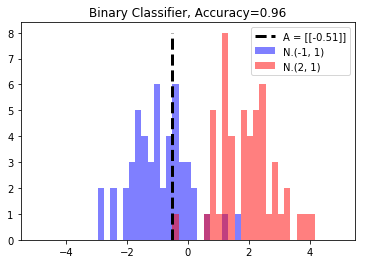

In [94]:
A_result = sess.run(A)
bins = np.linspace(-5, 5, 50)
plt.close()
plt.hist(x_vals[0: 50], bins, alpha=0.5, label='N.(-1, 1)', color='blue')
plt.hist(x_vals[50: 100], bins[0: 50], alpha=0.5, label='N.(2, 1)', color='red')
plt.plot((A_result[0][0], A_result[0][0]), (0, 8), 'k--', linewidth=3, label='A = ' + str(np.round(A_result, 2)))
plt.legend(loc='upper right')
plt.title('Binary Classifier, Accuracy=' + str(np.round(acc_value_train, 2)))
plt.show()